# The Virtual DataFrame

The Virtual DataFrame is the main object and star of the library and acts as the perfect transition between small and Big Data. The principle is quite simple: As Vertica is a powerful columnar massive parallel processing (MPP) database with many built-in functions, we want it to do as much of the computation work as possible.

Indeed, columnar orientation allows for high compression, and its structure inherently avoids unncessary parsing when retrieving data. MPP allows to parallelize our computations accross the different nodes. 

The best way to take advantage of your data is by simply keeping it in your Vertica database, rather than within the limitations of working memory. VerticaPy pushes all computation to your Vertica database before aggregating the final result, so you can get the best of both worlds: Vertica's power and Python's flexibility.<br>



With Python, it's easy to add abstractions, and the vDataFrame acts as the primary abstraction layer. Simple but powerful, it'll help any user through the data science life cycle.

## Creating the vDataFrame

There are two main ways to create a vDataFrame. 

The first is to create one directly using an existing relation.

None   pclass    survived                                      name   \\
1           1           0              Allison, Miss. Helen Loraine   \\
2           1           0      Allison, Mr. Hudson Joshua Creighton   \\
3           1           0  Allison, Mrs. Hudson J C (Bessie Wald...   \\
4           1           0                    Andrews, Mr. Thomas Jr   \\
5           1           0                   Artagaveytia, Mr. Ramon   \\
6           1           0                    Astor, Col. John Jacob   \\
7           1           0                       Baumann, Mr. John D   \\
8           1           0                  Baxter, Mr. Quigg Edmond   \\
9           1           0                      Beattie, Mr. Thomson   \\
10          1           0                       Birnbaum, Mr. Jakob   \\
11          1           0              Blackwell, Mr. Stephen Weart   \\
12          1           0                  Borebank, Mr. John James   \\
13          1           0                   Brady, Mr. John Bertram   \\
14          1           0                        Brandeis, Mr. Emil   \\
15          1           0                 Brewe, Dr. Arthur Jackson   \\
16          1           0         Butt, Major. Archibald Willingham   \\
17          1           0                     Cairns, Mr. Alexander   \\
18          1           0                  Carlsson, Mr. Frans Olof   \\
19          1           0                   Carrau, Mr. Francisco M   \\
20          1           0                    Carrau, Mr. Jose Pedro   \\
21          1           0                    Case, Mr. Howard Brown   \\
22          1           0             Cavendish, Mr. Tyrell William   \\
23          1           0               Chaffee, Mr. Herbert Fuller   \\
24          1           0     Chisholm, Mr. Roderick Robert Crispin   \\
25          1           0                  Clark, Mr. Walter Miller   \\
26          1           0               Clifford, Mr. George Quincy   \\
27          1           0                Colley, Mr. Edward Pomeroy   \\
28          1           0          Compton, Mr. Alexander Taylor Jr   \\
29          1           0                 Crafton, Mr. John Bertram   \\
30          1           0              Crosby, Capt. Edward Gifford   \\
31          1           0                 Cumings, Mr. John Bradley   \\
32          1           0                    Davidson, Mr. Thornton   \\
33          1           0                Douglas, Mr. Walter Donald   \\
34          1           0              Dulles, Mr. William Crothers   \\
35          1           0                  Evans, Miss. Edith Corse   \\
36          1           0                        Farthing, Mr. John   \\
37          1           0           Foreman, Mr. Benjamin Laventall   \\
38          1           0            Fortune, Mr. Charles Alexander   \\
39          1           0                         Fortune, Mr. Mark   \\
40          1           0               Franklin, Mr. Thomas Parham   \\
41          1           0                          Fry, Mr. Richard   \\
42          1           0               Futrelle, Mr. Jacques Heath   \\
43          1           0                         Gee, Mr. Arthur H   \\
44          1           0                        Giglio, Mr. Victor   \\
45          1           0                 Goldschmidt, Mr. George B   \\
46          1           0                 Graham, Mr. George Edward   \\
47          1           0                  Guggenheim, Mr. Benjamin   \\
48          1           0                 Harrington, Mr. Charles H   \\
49          1           0               Harris, Mr. Henry Birkhardt   \\
50          1           0                     Harrison, Mr. William   \\
51          1           0                Hays, Mr. Charles Melville   \\
52          1           0                     Head, Mr. Christopher   \\
53          1           0               Hilliard, Mr. Herbert Henry   \\
54          1           0               Hipkins, Mr. Willi
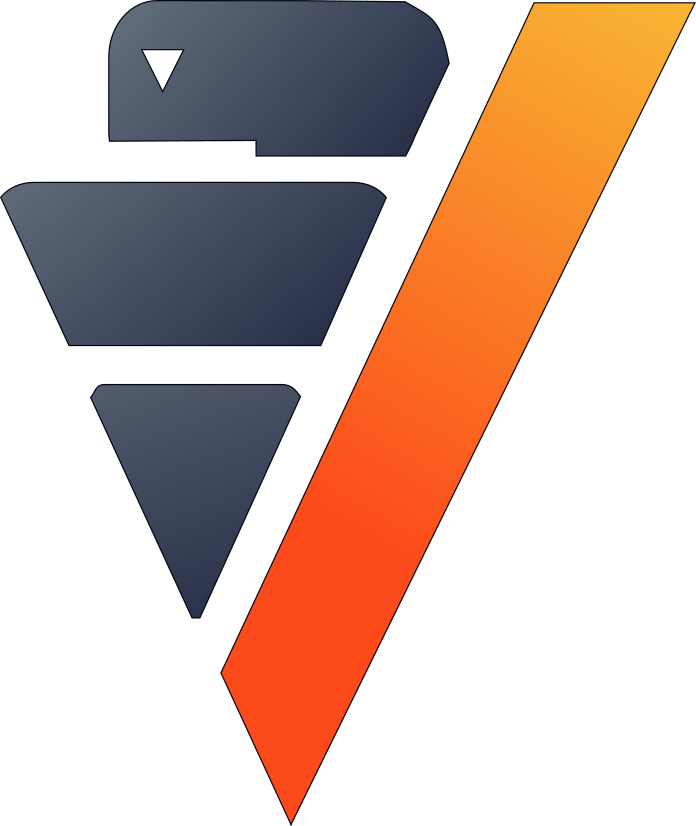

In [1]:
from verticapy.datasets import load_titanic
load_titanic() # Loading the titanic dataset in Vertica

import verticapy as vp
vp.vDataFrame("public.titanic")

We can also create one using a customized relation.

None  pclass             survived  
1         1    0.612179487179487  
2         2    0.416988416988417  
3         3    0.227752639517345  
Rows: 1-3 | Columns: 2
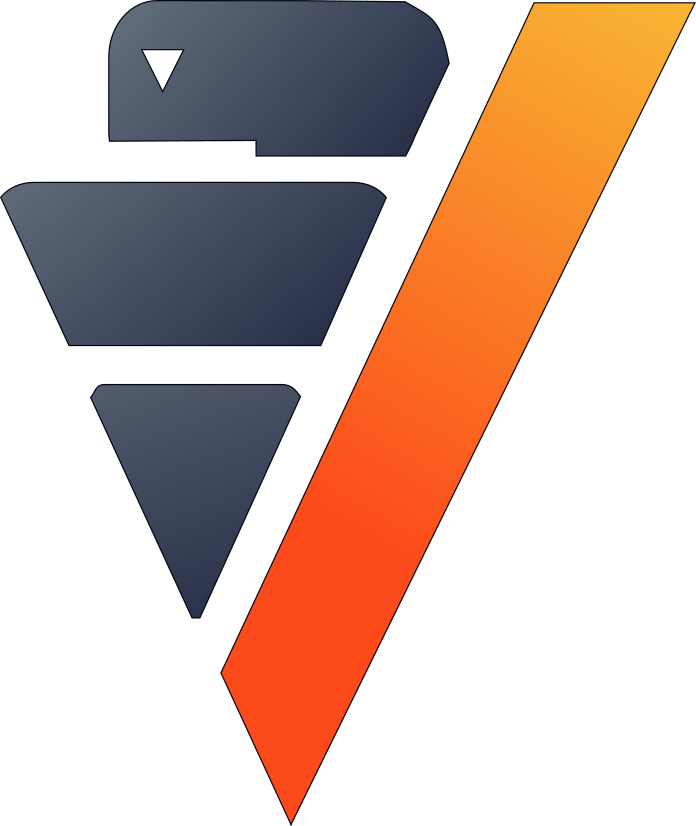

In [2]:
vp.vDataFrame("SELECT pclass, AVG(survived) AS survived FROM titanic GROUP BY 1")

### In-memory vs. In-database Loading and Processing

First, let's load the <a href="https://www.kaggle.com/competitions/expedia-hotel-recommendations/data">expedia</a> dataset in Vertica.

The table "public"."expedia" has been successfully created.


None             date_time    site_name    posa_continent    user_location_country   \\
1      2013-07-23 14:57:22            2                 3                       66   \\
2      2013-07-23 14:57:23            2                 3                       66   \\
3      2013-07-23 14:57:23           34                 3                      205   \\
4      2013-07-23 14:57:24            2                 3                      190   \\
5      2013-07-23 14:57:25           36                 2                      115   \\
6      2013-07-23 14:57:28            2                 3                       82   \\
7      2013-07-23 14:57:31            2                 3                       66   \\
8      2013-07-23 14:57:31            2                 3                       66   \\
9      2013-07-23 14:57:32           34                 3                      205   \\
10     2013-07-23 14:57:33           24                 2                        3   \\
11     2013-07-23 14:57:34            2                 3                        1   \\
12     2013-07-23 14:57:34            2                 3                       80   \\
13     2013-07-23 14:57:37            8                 4                       77   \\
14     2013-07-23 14:57:38           11                 3                      205   \\
15     2013-07-23 14:57:39            2                 3                       66   \\
16     2013-07-23 14:57:41            2                 3                       66   \\
17     2013-07-23 14:57:44           32                 1                       62   \\
18     2013-07-23 14:57:44           37                 1                       69   \\
19     2013-07-23 14:57:51           24                 2                        3   \\
20     2013-07-23 14:57:53           24                 2                        3   \\
21     2013-07-23 14:57:57            2                 3                       66   \\
22     2013-07-23 14:57:57           37                 1                       69   \\
23     2013-07-23 14:57:58            2                 3                       66   \\
24     2013-07-23 14:57:58            2                 3                       66   \\
25     2013-07-23 14:58:00           37                 1                       69   \\
26     2013-07-23 14:58:02           37                 1                       69   \\
27     2013-07-23 14:58:05           24                 2                        3   \\
28     2013-07-23 14:58:05           24                 2                        3   \\
29     2013-07-23 14:58:08            2                 3                       66   \\
30     2013-07-23 14:58:09           18                 2                      119   \\
31     2013-07-23 14:58:13            2                 3                       66   \\
32     2013-07-23 14:58:14            2                 3                       66   \\
33     2013-07-23 14:58:17            2                 3                       66   \\
34     2013-07-23 14:58:18           24                 2                        3   \\
35     2013-07-23 14:58:24           11                 3                      205   \\
36     2013-07-23 14:58:24           37                 1                       69   \\
37     2013-07-23 14:58:25           11                 3                      205   \\
38     2013-07-23 14:58:26           11                 3                      205   \\
39     2013-07-23 14:58:27           37                 1                       69   \\
40     2013-07-23 14:58:31           34                 3                      205   \\
41     2013-07-23 14:58:36           34                 3                      205   \\
42     2013-07-23 14:58:37            2                 3                       66   \\
43     2013-07-23 14:58:37            8                 4                       77   \\
44     2013-07-23 14:58:37           34                 3                      205   \\
45     2013-07-23 14:58:37           37 
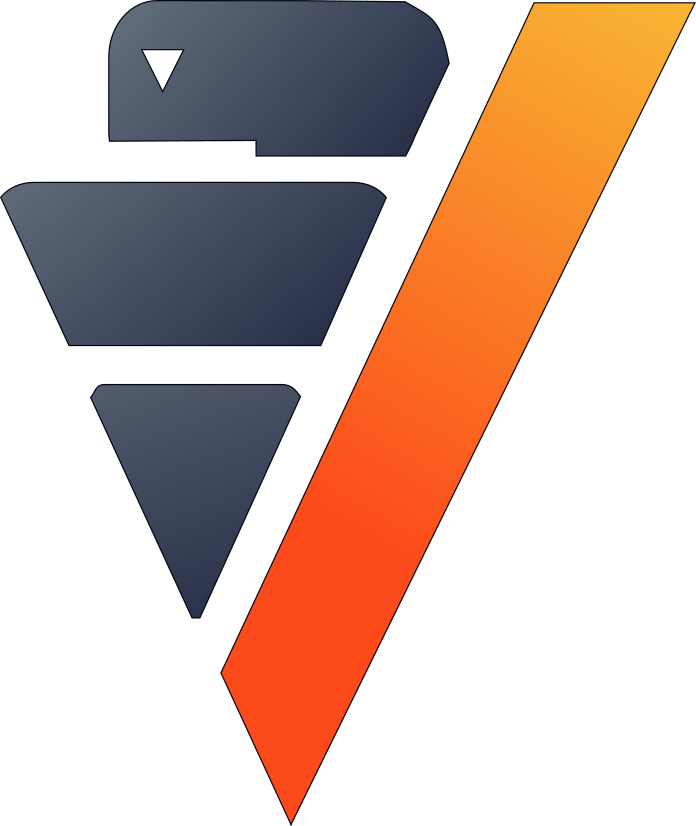

In [3]:
vp.read_csv("data/expedia.csv", schema = "public", parse_nrows = 20000000)

To understand the main difference between loading data into memory and loading data into a Vertica database, let's create a vDataFrame using an existing relation.

In [4]:
import time
start_time = time.time()
expedia = vp.vDataFrame("public.expedia")
print("elapsed time = {}".format(time.time() - start_time))

elapsed time = 0.06939864158630371


It took less than a second to create a vDataFrame. This dataset comes in at 6GB, which is very expensive for a personal machine, so we store the data entirely in Vertica and nothing is loaded into memory.

Let's compare this to loading the data into memory with pandas. You can try to load the <a href="https://www.kaggle.com/c/expedia-hotel-recommendations">entire dataset</a> in your computer if you have at least 8GB of memory.

In [5]:
import pandas as pd

L_nrows = [10000, 100000, 1000000, 2000000, 5000000, 10000000, 20000000]
L_time = []
for nrows in L_nrows:
    start_time = time.time()
    expedia_df = pd.read_csv("data/expedia.csv", nrows = nrows)
    elapsed_time = time.time() - start_time
    L_time.append(elapsed_time)
    print("nrows = {}; elapsed time = {}".format(nrows, elapsed_time))

nrows = 10000; elapsed time = 0.05681443214416504
nrows = 100000; elapsed time = 0.29686856269836426
nrows = 1000000; elapsed time = 2.1426444053649902
nrows = 2000000; elapsed time = 4.888331890106201
nrows = 5000000; elapsed time = 11.65846586227417
nrows = 10000000; elapsed time = 23.3897807598114
nrows = 20000000; elapsed time = 56.20888710021973


Loading data into pandas is quite fast when the data volume is low (less than some MB), but as the size of the dataset increases, it can become exponentially more expensive.

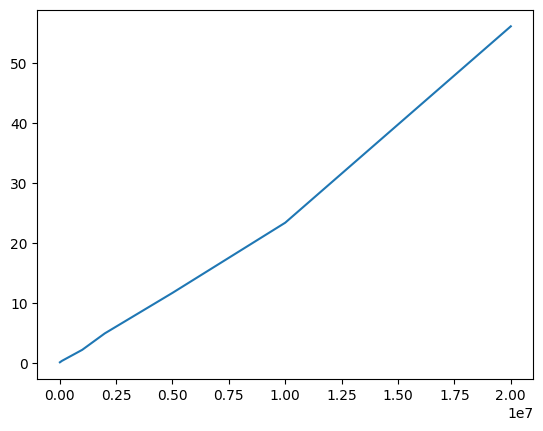

In [6]:
import matplotlib.pyplot as plt
plt.plot(L_nrows, L_time)
plt.show()

Performance will also drastically decrease.

In [7]:
# Remove non-numeric columns
columns_to_drop = ['date_time', 'srch_ci', 'srch_co'] 
expedia_df = expedia_df.drop(columns_to_drop, axis=1)

In [8]:
start_time = time.time()
expedia_df.corr()
print(f"elapsed time = {time.time() - start_time}")

elapsed time = 29.122333765029907


We're only using a little bit more than half of the dataset and it took almost 30 seconds to compute the correlation matrix.

Let's compute the entire correlation matrix using the vDataFrame.

None   site_name    posa_continent    user_location_country    user_location_region   \\
1             23                 1                        1                     165   \\
2             24                 2                        3                      50   \\
3             22                 2                        0                     232   \\
4              2                 3                       19                      38   \\
5              2                 3                       66                     189   \\
6              2                 3                       66                     447   \\
7              2                 3                       66                     314   \\
8             26                 0                      215                     817   \\
9              8                 4                       77                     871   \\
10             2                 3                       66                     246   \\
11            24                 2                        3                      64   \\
12             8                 4                       77                     462   \\
13             2                 3                       66                     256   \\
14             2                 3                       66                     174   \\
15             2                 3                       66                     321   \\
16            24                 2                        3                      64   \\
17             2                 3                       66                     442   \\
18            24                 2                        3                      65   \\
19             2                 3                       66                     293   \\
20            11                 3                      205                     354   \\
21            14                 1                      214                     120   \\
22            11                 3                      205                     155   \\
23            24                 2                        3                      50   \\
24             2                 3                       66                     403   \\
25            34                 3                      205                     155   \\
26            37                 1                       69                     676   \\
27             2                 3                       66                     331   \\
28             2                 3                       66                     348   \\
29            34                 3                      205                     343   \\
30             2                 3                       66                     462   \\
31             2                 3                       66                     174   \\
32             2                 3                       23                      48   \\
33             2                 3                       66                     322   \\
34            11                 3                      205                     385   \\
35            13                 1                        5                       5   \\
36             2                 3                       66                     322   \\
37             8                 4                       77                     462   \\
38            23                 1                        1                     152   \\
39             2                 3                       66                     246   \\
40             2                 3                       66                     143   \\
41            34                 3                       66                     184   \\
42             2                 3                       66                     442   \\
43            24                 2                        3                      49   \\
44             2                 3                       66                     363 
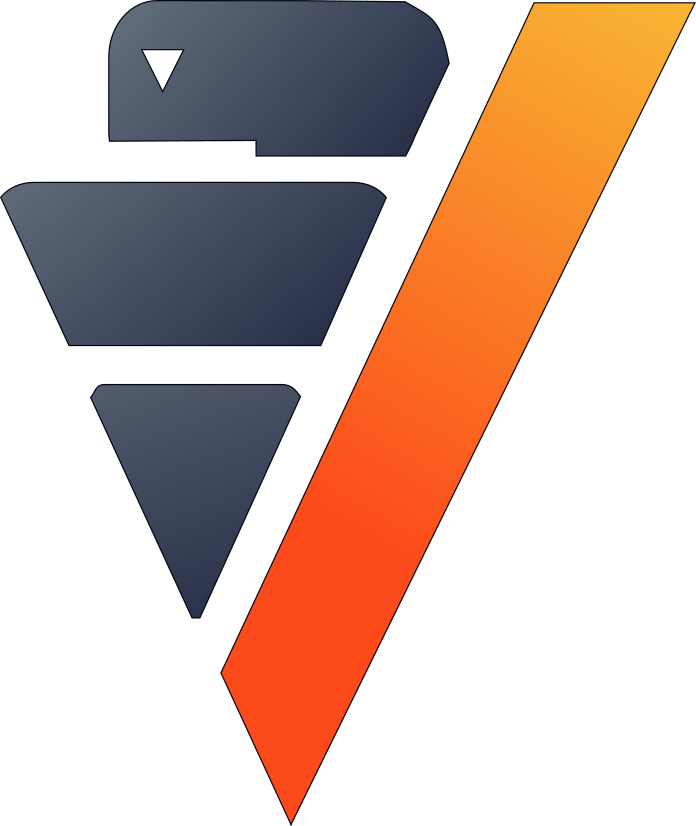

In [9]:
# Remove non-numeric columns
expedia.drop(columns = ['date_time', 'srch_ci', 'srch_co'])

In [10]:
start_time = time.time()
expedia.corr(show = False)
print(f"elapsed time = {time.time() - start_time}")

elapsed time = 274.9952471256256


It took almost 270 seconds on one single Community Edition Vertica cluster without using any Vertica-specific features that might increase performance, like creating projections and or compression features.

VerticaPy caches the computed aggregations. With this cache available, we can repeat the correlation matrix computation almost instantaneously.

In [11]:
start_time = time.time()
expedia.corr(show = False)
print(f"elapsed time = {time.time() - start_time}")

  0%|          | 0/20 [00:00<?, ?it/s]

elapsed time = 0.16117000579833984


If needed, the cache can be deactivated. 

Let's look at the memory usage for less than half of the dataset: Pandas is taking more than 3.6 GB. 

In [12]:
expedia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   site_name                  int64  
 1   posa_continent             int64  
 2   user_location_country      int64  
 3   user_location_region       int64  
 4   user_location_city         int64  
 5   orig_destination_distance  float64
 6   user_id                    int64  
 7   is_mobile                  int64  
 8   is_package                 int64  
 9   channel                    int64  
 10  srch_adults_cnt            int64  
 11  srch_children_cnt          int64  
 12  srch_rm_cnt                int64  
 13  srch_destination_id        int64  
 14  srch_destination_type_id   int64  
 15  is_booking                 int64  
 16  cnt                        int64  
 17  hotel_continent            int64  
 18  hotel_country              int64  
 19  hotel_market               int64  
 20  

Let's compare that to the total memory usage of the vDataFrame; but instead of loading half the dataset, we'll load the entire dataset: less than 44KB!

The vDataFrame remembers the user's modifications to the data, but never loads the data itself into memory.

None                             value  
object                             919  
"site_name"                       1727  
"posa_continent"                  1732  
"user_location_country"           1739  
"user_location_region"            1738  
"user_location_city"              1736  
"orig_destination_distance"       1743  
"user_id"                         1725  
"is_mobile"                       1727  
"is_package"                      1728  
"channel"                         1725  
"srch_adults_cnt"                 1733  
"srch_children_cnt"               1735  
"srch_rm_cnt"                     1729  
"srch_destination_id"             1737  
"srch_destination_type_id"        1742  
"is_booking"                      1728  
"cnt"                             1721  
"hotel_continent"                 1733  
"hotel_country"                   1731  
"hotel_market"                    1730  
"hotel_cluster"                   1731  
total                            37289  
Rows: 1-23 | Columns: 2
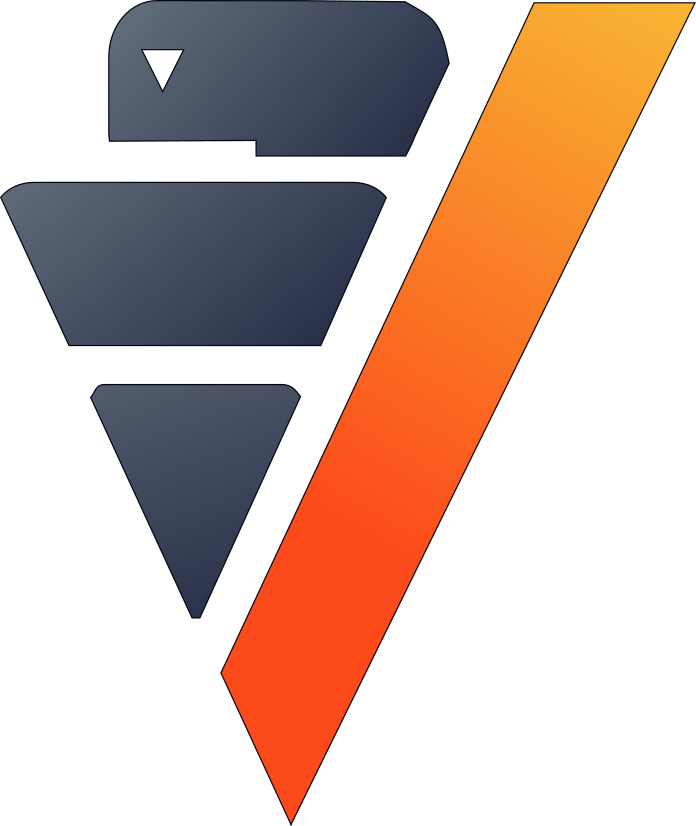

In [13]:
expedia.memory_usage()

We can see a clear difference. With VerticaPy, we can take advantage of Vertica's structure and scalability and run fast queries without ever loading the data into memory. In-memory processing is limited by many factors which lead to downsampling most of the time.

### The Structure of the vDataFrame

A vDataFrame is composed of columns called vColumns. You can see these with the 'get_columns' method.

In [14]:
expedia.get_columns()

['"site_name"',
 '"posa_continent"',
 '"user_location_country"',
 '"user_location_region"',
 '"user_location_city"',
 '"orig_destination_distance"',
 '"user_id"',
 '"is_mobile"',
 '"is_package"',
 '"channel"',
 '"srch_adults_cnt"',
 '"srch_children_cnt"',
 '"srch_rm_cnt"',
 '"srch_destination_id"',
 '"srch_destination_type_id"',
 '"is_booking"',
 '"cnt"',
 '"hotel_continent"',
 '"hotel_country"',
 '"hotel_market"',
 '"hotel_cluster"']

To access a vColumn, simply write its name between between square brackets.

None   is_booking  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  
10              0  
11              0  
12              0  
13              0  
14              0  
15              0  
16              0  
17              0  
18              0  
19              1  
20              0  
21              0  
22              0  
23              0  
24              0  
25              0  
26              0  
27              0  
28              0  
29              0  
30              0  
31              0  
32              0  
33              0  
34              0  
35              0  
36              0  
37              0  
38              0  
39              0  
40              0  
41              0  
42              0  
43              0  
44              0  
45              0  
46              0  
47              0  
48              0  
49              0  
50              0  
51              0  
52              0  
53              0  
54              0  
55              0  
56              0  
57              1  
58              0  
59              0  
60              0  
61              0  
62              0  
63              0  
64              0  
65              0  
66              0  
67              0  
68              0  
69              0  
70              0  
71              0  
72              0  
73              0  
74              1  
75              0  
76              0  
77              0  
78              0  
79              1  
80              0  
81              0  
82              0  
83              0  
84              0  
85              0  
86              0  
87              0  
88              0  
89              0  
90              0  
91              0  
92              0  
93              0  
94              0  
95              0  
96              0  
97              1  
98              0  
99              0  
100             0  
...           ...  
Rows: 1-100 of 37670293 | Column: is_booking | Type: Integer
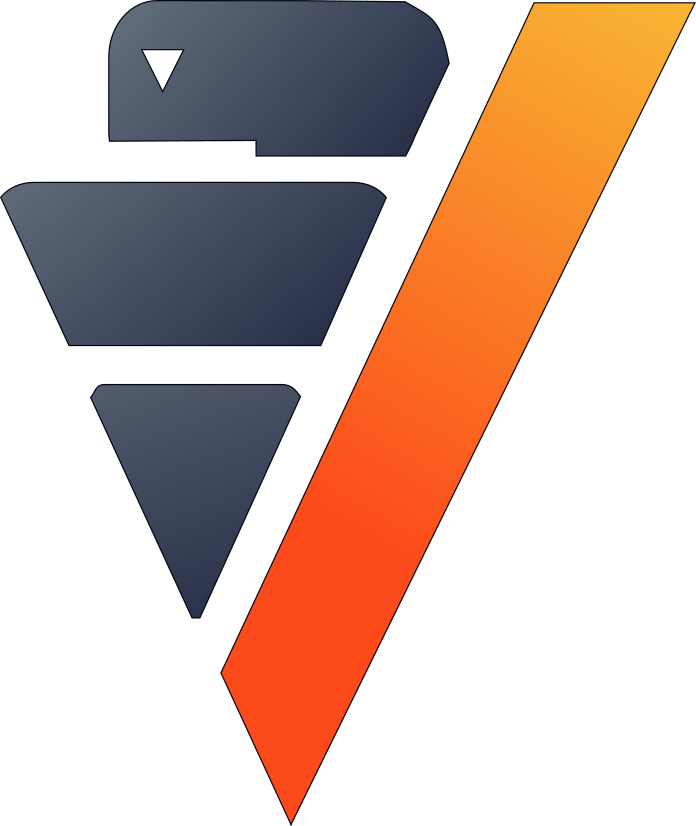

In [15]:
expedia["is_booking"]

VerticaPy is smart enough to not recompute an aggregation that it's already computed.

None               value  
name        "is_booking"  
dtype                int  
unique               2.0  
count         37670293.0  
0               34669600  
1                3000693  
Rows: 1-6 | Columns: 2
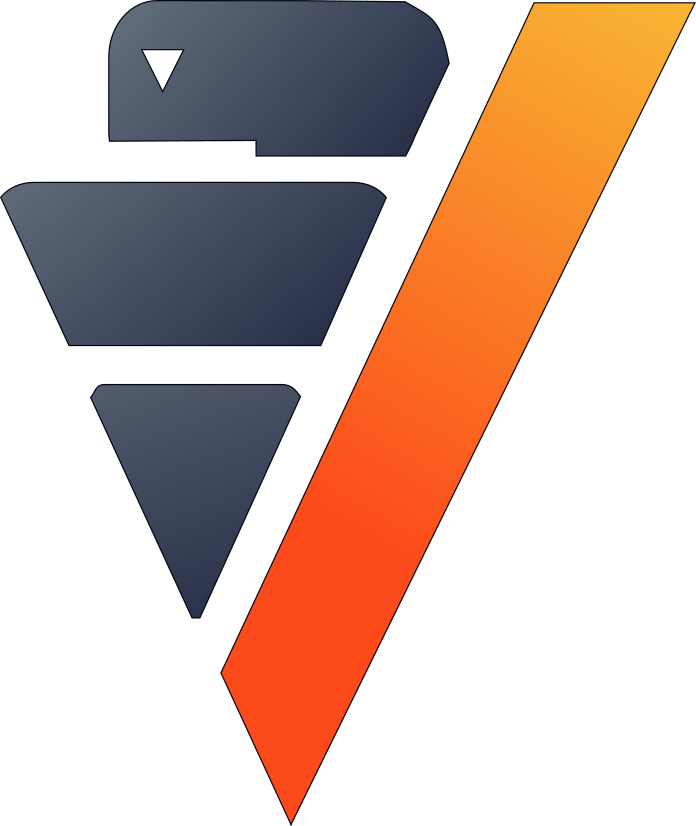

In [16]:
expedia["is_booking"].describe()

Each vColumn has its own catalog to save user modifications.

For example, we previously computed some aggregations for the column 'is_booking'. Let's look at the catalog of the vColumn.

In [17]:
expedia["is_booking"]._catalog

{'cov': {},
 'pearson': {'"site_name"': -0.0103791330144224,
  '"posa_continent"': 0.00972436717006096,
  '"user_location_country"': 0.00752614887257535,
  '"user_location_region"': 0.00635166380501374,
  '"user_location_city"': 0.00222760096637965,
  '"orig_destination_distance"': -0.0377320625613433,
  '"user_id"': 0.00182006552587311,
  '"is_mobile"': -0.0307536571387009,
  '"is_package"': -0.0763467336220978,
  '"channel"': 0.0244378703859355,
  '"srch_adults_cnt"': -0.0490450028206689,
  '"srch_children_cnt"': -0.0222719630493467,
  '"srch_rm_cnt"': 0.0108395233625253,
  '"srch_destination_id"': 0.0249567593167415,
  '"srch_destination_type_id"': 0.0404728725370959,
  '"is_booking"': 1.0,
  '"cnt"': -0.112906513841061,
  '"hotel_continent"': -0.0261279829743103,
  '"hotel_country"': -0.00394808105853647,
  '"hotel_market"': 0.0119576115952104,
  '"hotel_cluster"': -0.021548065656294},
 'spearman': {},
 'spearmand': {},
 'kendall': {},
 'cramer': {},
 'biserial': {},
 'regr_avgx': 

It will save the most important aggregations to avoid recomputation. The catalog will be updated whenever we make major changes to our data.

We can also view the vDataFrame's backend SQL code generation by setting 'sql_on' with the 'set_option' function.

None                       value  
name                       "cnt"  
dtype                        int  
unique                     103.0  
count                   37670293  
mean             1.4833839227106  
std             1.21977557865592  
min                          1.0  
approx_25%                   1.0  
approx_50%                   1.0  
approx_75%                   2.0  
max                        269.0  
Rows: 1-11 | Columns: 2
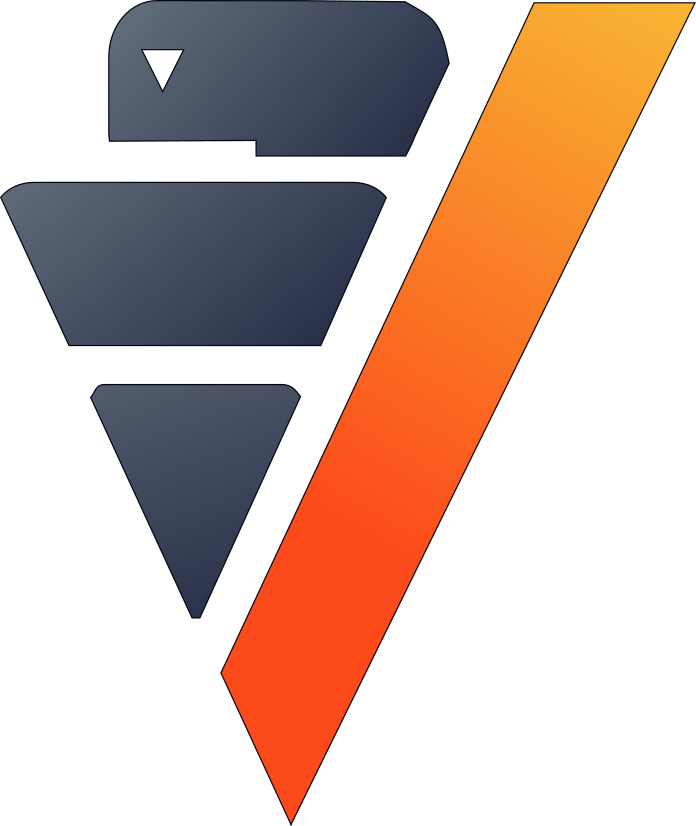

In [18]:
vp.set_option("sql_on", True)
expedia["cnt"].describe()

You can also display the elapsed time of the different queries. For example, let's compute the correlation matrix of the vDataFrame. 

<b>Note</b>: In order to display matplotlib graphics in Jupyter, you'll need to use the '%matplotlib inline' command the first time you decide to draw a graphic.

In [ ]:
expedia = vp.vDataFrame("public.expedia") # creating a new vDataFrame to delete the catalog 
expedia.corr()

All heavy computations are pushed to Vertica, and each aggregation is saved to each vColumn's catalog. If we call the 'corr' method again, it'll only take a couple seconds (time needed to draw the graphic).

elapsed time = 122.67310070991516


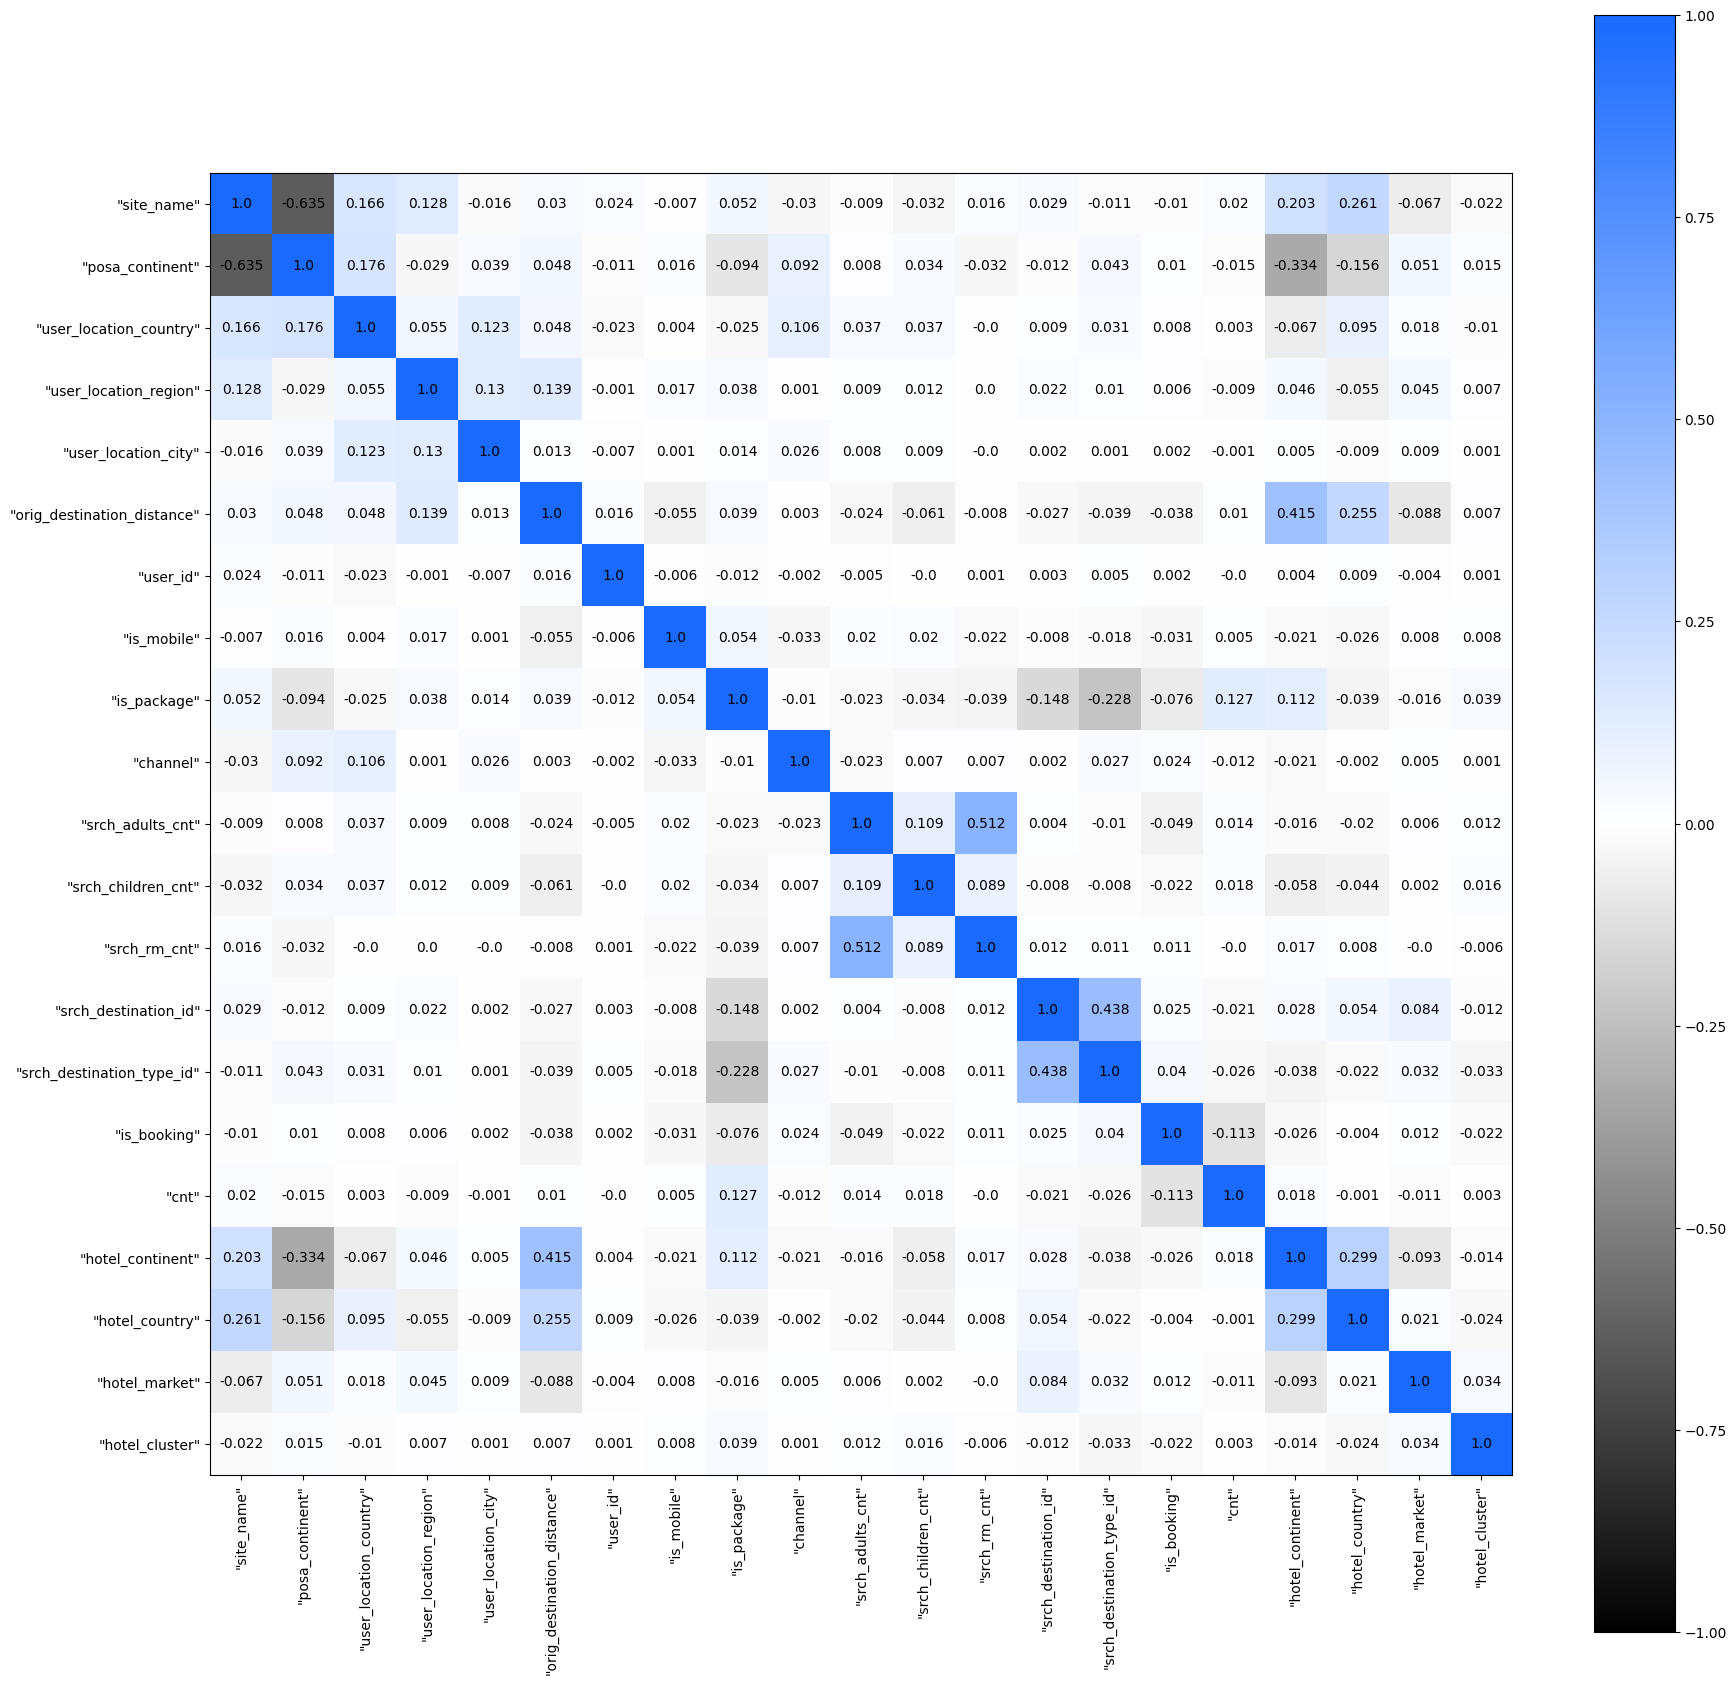

In [20]:
start_time = time.time()
expedia.corr()
print("elapsed time = {}".format(time.time() - start_time))

We can turn off the different functions to display the elapsed time and the SQL code generation.

In [21]:
vp.set_option("sql_on", False)
vp.set_option("time_on", False)

You can access the current vDataFrame relation with the 'current_relation' method.

In [22]:
print(expedia.current_relation())

"public"."expedia"


Since we're working with SQL code generation, this relation will change according to the user's modifications. For example, let's impute the missing values of the vColumn 'orig_destination_distance' by its average and drop the vColumn 'is_package'. 

In [23]:
expedia["orig_destination_distance"].fillna(method = "avg")
expedia["is_package"].drop()
print(expedia.current_relation())

13525001 elements were filled.
(
   SELECT
     "date_time",
     "site_name",
     "posa_continent",
     "user_location_country",
     "user_location_region",
     "user_location_city",
     COALESCE("orig_destination_distance", 1970.0900267207) AS "orig_destination_distance",
     "user_id",
     "is_mobile",
     "channel",
     "srch_ci",
     "srch_co",
     "srch_adults_cnt",
     "srch_children_cnt",
     "srch_rm_cnt",
     "srch_destination_id",
     "srch_destination_type_id",
     "is_booking",
     "cnt",
     "hotel_continent",
     "hotel_country",
     "hotel_market",
     "hotel_cluster" 
   FROM
 (
                
   SELECT
     
                    "date_time",
     "site_name",
     "posa_continent",
     "user_location_country",
     "user_location_region",
     "user_location_city",
     "orig_destination_distance",
     "user_id",
     "is_mobile",
     "channel",
     "srch_ci",
     "srch_co",
     "srch_adults_cnt",
     "srch_children_cnt",
     "srch_rm_cnt

Notice how our dropping the vColumn 'is_package' simply removes it from the SELECT statement in our SQL query. Similarly, imputing a vColumn translates to using the 'COALESCE' SQL function.

### vDataFrame Attributes and Management

As we saw, the vDataFrame has many attributes and methods. vDataFrames have two types of attributes:
 - Virtual Columns
 - Main Attributes (columns, main_relation ...)

The vDataFrame's main attributes are stored in the _vars dictionary.

In [24]:
expedia._vars

{'allcols_ind': 24,
 'count': 37670293,
 'exclude_columns': [],
 'history': ['{Tue Oct 17 09:09:39 2023} [Fillna]: 13525001 "orig_destination_distance" missing values were  filled.',
  '{Tue Oct 17 09:09:39 2023} [Drop]: vDataColumn "is_package" was deleted from the vDataFrame.'],
 'isflex': False,
 'max_columns': -1,
 'max_rows': -1,
 'order_by': {},
 'saving': [],
 'sql_push_ext': False,
 'sql_magic_result': False,
 'symbol': '$',
 'where': [],
 'columns': ['"date_time"',
  '"site_name"',
  '"posa_continent"',
  '"user_location_country"',
  '"user_location_region"',
  '"user_location_city"',
  '"orig_destination_distance"',
  '"user_id"',
  '"is_mobile"',
  '"channel"',
  '"srch_ci"',
  '"srch_co"',
  '"srch_adults_cnt"',
  '"srch_children_cnt"',
  '"srch_rm_cnt"',
  '"srch_destination_id"',
  '"srch_destination_type_id"',
  '"is_booking"',
  '"cnt"',
  '"hotel_continent"',
  '"hotel_country"',
  '"hotel_market"',
  '"hotel_cluster"'],
 'main_relation': '"public"."expedia"'}

You should never change these attributes manually.

### vDataFrame Data Types

The vDataFrame uses the data types of its vColumns. Computing an histogram for a numerical data type is not the same as computing one other for a categorical data type. The vDataFrame identifies four main categories:

<ul class="ul_content">
 <li>int: integers are treated like categorical data types when their cardinality is low and will be considered numeric otherwise</li>
 <li>float: numerics</li>
 <li>date: date-like data types</li>
 <li>text: categorical data types</li>
</ul>
 
Other data types may automatically treated as categorical. You can examine these different data types using the 'dtypes' method.

None                                 dtype  
"date_time"                      timestamp  
"site_name"                            int  
"posa_continent"                       int  
"user_location_country"                int  
"user_location_region"                 int  
"user_location_city"                   int  
"orig_destination_distance"          float  
"user_id"                              int  
"is_mobile"                            int  
"channel"                              int  
"srch_ci"                             date  
"srch_co"                             date  
"srch_adults_cnt"                      int  
"srch_children_cnt"                    int  
"srch_rm_cnt"                          int  
"srch_destination_id"                  int  
"srch_destination_type_id"             int  
"is_booking"                           int  
"cnt"                                  int  
"hotel_continent"                      int  
"hotel_country"                        int  
"hotel_market"                         int  
"hotel_cluster"                        int  
Rows: 1-23 | Columns: 2
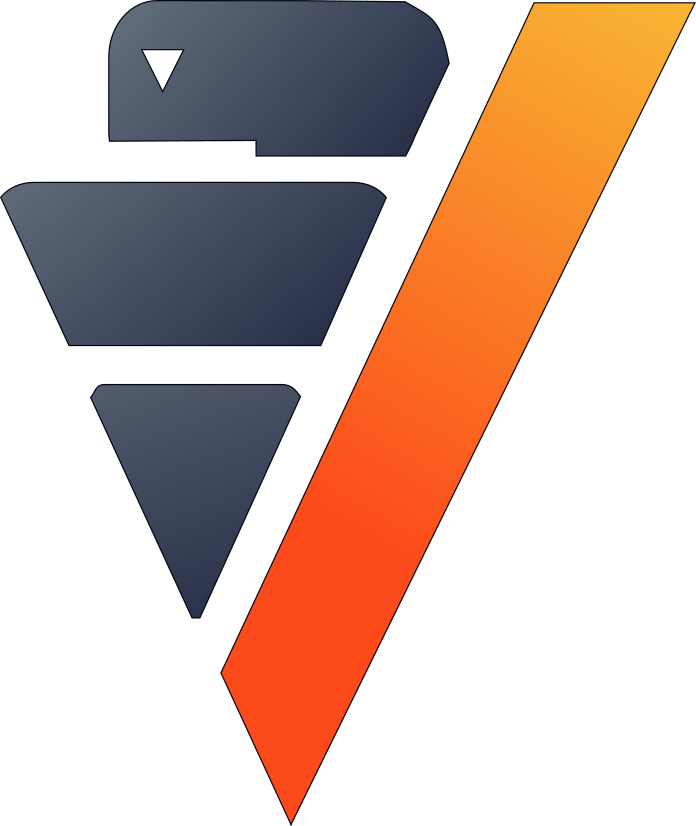

In [25]:
expedia.dtypes()

You can perform conversions with the 'astype' method.

In [26]:
expedia["hotel_market"].astype("varchar")
expedia["hotel_market"].ctype()

'varchar'

You can also get the vColumn category using the 'category' method.

In [27]:
expedia["hotel_market"].category()

'text'

### Exporting / Saving / Loading a vDataFrame

The functions 'save' and 'load' allow the user to save and load their vDataFrame structure.

34669600 elements were filtered.


None             date_time    site_name    posa_continent    user_location_country   \\
1      2013-01-07 00:00:50            2                 3                       66   \\
2      2013-01-07 00:02:02           34                 3                      205   \\
3      2013-01-07 00:02:21           34                 3                      205   \\
4      2013-01-07 00:04:02            2                 3                       66   \\
5      2013-01-07 00:04:37            2                 3                       66   \\
6      2013-01-07 00:07:03           11                 3                      205   \\
7      2013-01-07 00:11:47           11                 3                      205   \\
8      2013-01-07 00:14:24            2                 3                       66   \\
9      2013-01-07 00:16:01           24                 2                        3   \\
10     2013-01-07 00:16:53           17                 1                      133   \\
11     2013-01-07 00:17:08           24                 2                        3   \\
12     2013-01-07 00:18:10           13                 1                       63   \\
13     2013-01-07 00:18:59           24                 2                        3   \\
14     2013-01-07 00:23:30           24                 2                        3   \\
15     2013-01-07 00:28:05            2                 3                       66   \\
16     2013-01-07 00:28:56           17                 1                      133   \\
17     2013-01-07 00:29:04            8                 4                       77   \\
18     2013-01-07 00:29:35            2                 3                       66   \\
19     2013-01-07 00:29:56           13                 1                       85   \\
20     2013-01-07 00:32:00           17                 1                      133   \\
21     2013-01-07 00:35:17           24                 2                        3   \\
22     2013-01-07 00:36:17           24                 2                      231   \\
23     2013-01-07 00:39:56            2                 3                      149   \\
24     2013-01-07 00:41:02           24                 2                        3   \\
25     2013-01-07 00:41:37            2                 3                      119   \\
26     2013-01-07 00:43:49            2                 3                       66   \\
27     2013-01-07 00:46:19            2                 3                       66   \\
28     2013-01-07 00:48:55            8                 4                       77   \\
29     2013-01-07 00:49:31            2                 3                       66   \\
30     2013-01-07 00:52:12           24                 2                        3   \\
31     2013-01-07 00:54:06            2                 3                        0   \\
32     2013-01-07 00:59:45           37                 1                       69   \\
33     2013-01-07 00:59:56           24                 2                        3   \\
34     2013-01-07 01:03:03            2                 3                       66   \\
35     2013-01-07 01:06:59           24                 2                        3   \\
36     2013-01-07 01:07:43           37                 1                       69   \\
37     2013-01-07 01:07:50            8                 4                       77   \\
38     2013-01-07 01:11:05            2                 3                      133   \\
39     2013-01-07 01:14:19            2                 3                       35   \\
40     2013-01-07 01:17:04            2                 3                       69   \\
41     2013-01-07 01:18:47           24                 2                        3   \\
42     2013-01-07 01:25:10            2                 3                       55   \\
43     2013-01-07 01:25:56           24                 2                        3   \\
44     2013-01-07 01:26:21           24                 2                      167   \\
45     2013-01-07 01:26:27            2 
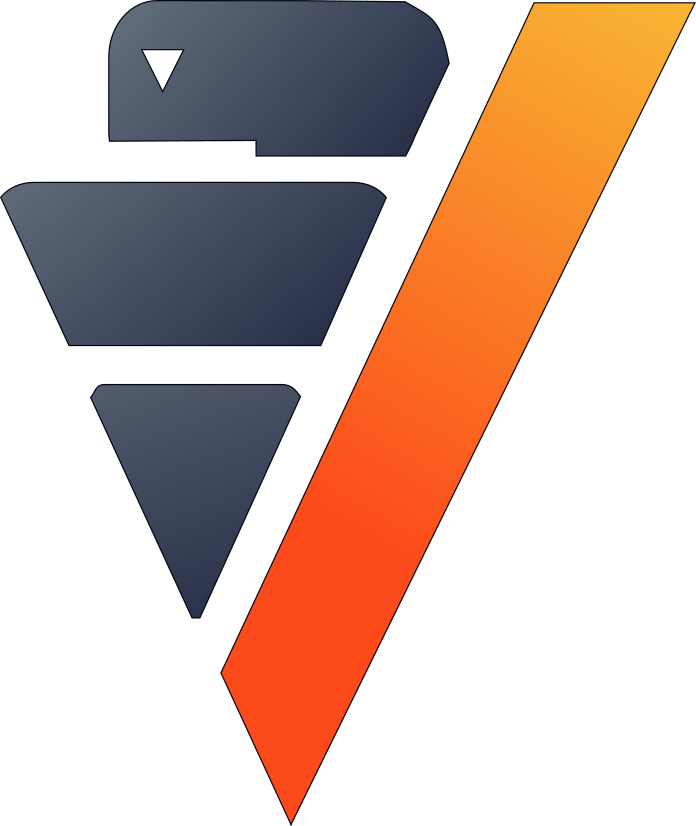

In [28]:
expedia.save()
expedia.filter("is_booking = 1")

In this example, we filtered some data and want to go back to the previous structure. 

In [29]:
expedia = expedia.load()
print(expedia.shape())

(37670293, 23)


Don't forget to use the help function when you need more information about the different functions!

In [30]:
help(expedia.load)

Help on method load in module verticapy.core.vdataframe._io:

load(offset: int = -1) -> 'vDataFrame' method of verticapy.core.vdataframe.base.vDataFrame instance
    Loads a previous structure of the vDataFrame.
    
    Parameters
    ----------
    offset: int, optional
        Offset of the saving. For example, setting to
        -1 loads the last saving.
    
    Returns
    -------
    vDataFrame
        vDataFrame of the loading.



The vDataFrame works the same way as a view. However, nothing is stored in the database unless you do it explicitly with the 'to_db' method.

You can save the vDataFrame's final relation using the 'to_db' method. If you want to save the result into a table, be sure to look at the expected disk usage of exporting the vDataFrame.

  0%|          | 0/2 [00:00<?, ?it/s]

None                                 expected_size (Gb)             max_size (Gb)         type  
"date_time"                       7.450580596923828e-09        0.2806655541062355    timestamp  
"site_name"                        0.047050174325704575        0.2806655541062355          int  
"posa_continent"                    0.03508319426327944        0.2806655541062355          int  
"user_location_country"             0.07453343831002712        0.2806655541062355          int  
"user_location_region"              0.09974934346973896        0.2806655541062355          int  
"user_location_city"                0.16734247468411922        0.2806655541062355          int  
"orig_destination_distance"       7.450580596923828e-09        0.2806655541062355        float  
"user_id"                           0.21339667681604624        0.2806655541062355          int  
"is_mobile"                         0.03508319426327944        0.2806655541062355          int  
"channel"                           0.03508897125720978        0.2806655541062355          int  
"srch_ci"                         7.450580596923828e-09       0.28031475841999054         date  
"srch_co"                         7.450580596923828e-09       0.28031475096940994         date  
"srch_adults_cnt"                   0.03508319426327944        0.2806655541062355          int  
"srch_children_cnt"                 0.03508319426327944        0.2806655541062355          int  
"srch_rm_cnt"                       0.03508319426327944        0.2806655541062355          int  
"srch_destination_id"               0.15629629883915186        0.2806655541062355          int  
"srch_destination_type_id"          0.03508319426327944        0.2806655541062355          int  
"is_booking"                        0.03508319426327944        0.2806655541062355          int  
"cnt"                               0.03518901206552982        0.2806655541062355          int  
"hotel_continent"                   0.03508319426327944        0.2806655541062355          int  
"hotel_country"                      0.0782695272937417        0.2806655541062355          int  
"hotel_market"                      0.10538724157959223         2.806655541062355      varchar  
"hotel_cluster"                     0.06651502475142479        0.2806655541062355          int  
separator                            0.8069134680554271        0.8069134680554271               
header                           3.4831464290618896e-07    3.4831464290618896e-07               
rawsize                               2.166397583670914         9.787509948946536               
Rows: 1-26 | Columns: 4
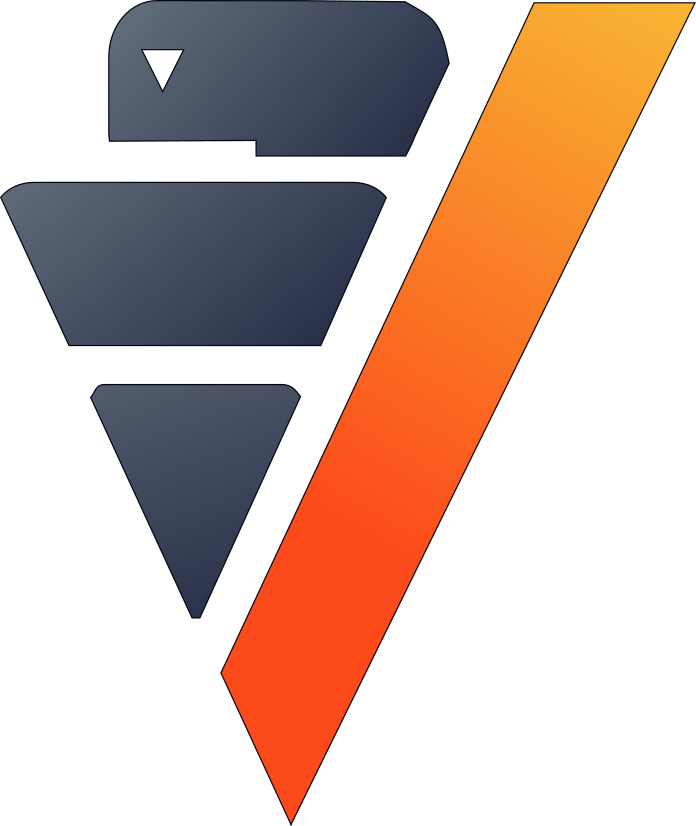

In [31]:
expedia.expected_store_usage(unit = "Gb")

After we decide that we have the space to store the vDataFrame, we can store it in our database.

None             date_time    site_name    posa_continent    user_location_country   \\
1      2013-03-16 10:47:38            2                 3                       66   \\
2      2013-03-16 10:47:43            2                 3                       66   \\
3      2013-03-16 10:47:45           13                 1                       46   \\
4      2013-03-16 10:47:46           11                 3                      205   \\
5      2013-03-16 10:47:47            2                 3                       66   \\
6      2013-03-16 10:47:55           22                 2                        0   \\
7      2013-03-16 10:47:57            2                 3                       66   \\
8      2013-03-16 10:47:58           37                 1                       69   \\
9      2013-03-16 10:47:59            2                 3                       66   \\
10     2013-03-16 10:48:04            2                 3                       66   \\
11     2013-03-16 10:48:04            2                 3                       66   \\
12     2013-03-16 10:48:04            2                 3                       66   \\
13     2013-03-16 10:48:12           15                 1                       55   \\
14     2013-03-16 10:48:16            8                 4                      202   \\
15     2013-03-16 10:48:21            2                 3                      231   \\
16     2013-03-16 10:48:23           11                 3                      205   \\
17     2013-03-16 10:48:25           37                 1                       69   \\
18     2013-03-16 10:48:29           11                 3                      205   \\
19     2013-03-16 10:48:30            2                 3                       66   \\
20     2013-03-16 10:48:34            2                 3                       66   \\
21     2013-03-16 10:48:35            2                 3                       66   \\
22     2013-03-16 10:48:36            2                 3                      231   \\
23     2013-03-16 10:48:39            2                 3                       66   \\
24     2013-03-16 10:48:40           37                 1                       69   \\
25     2013-03-16 10:48:41           13                 1                       46   \\
26     2013-03-16 10:48:43            2                 3                       66   \\
27     2013-03-16 10:48:43            2                 3                       66   \\
28     2013-03-16 10:48:43           37                 1                       69   \\
29     2013-03-16 10:48:45            2                 3                       66   \\
30     2013-03-16 10:48:45           37                 1                       69   \\
31     2013-03-16 10:48:49            2                 3                       66   \\
32     2013-03-16 10:48:49           37                 1                       69   \\
33     2013-03-16 10:48:50            2                 3                       66   \\
34     2013-03-16 10:48:58            2                 3                       66   \\
35     2013-03-16 10:49:03           11                 3                      205   \\
36     2013-03-16 10:49:03           11                 3                      205   \\
37     2013-03-16 10:49:04            2                 3                       66   \\
38     2013-03-16 10:49:05            2                 3                       66   \\
39     2013-03-16 10:49:07           11                 3                      205   \\
40     2013-03-16 10:49:08            2                 3                       66   \\
41     2013-03-16 10:49:08           37                 1                       69   \\
42     2013-03-16 10:49:09            2                 3                       66   \\
43     2013-03-16 10:49:10            2                 3                       66   \\
44     2013-03-16 10:49:11            2                 3                       66   \\
45     2013-03-16 10:49:13           37 
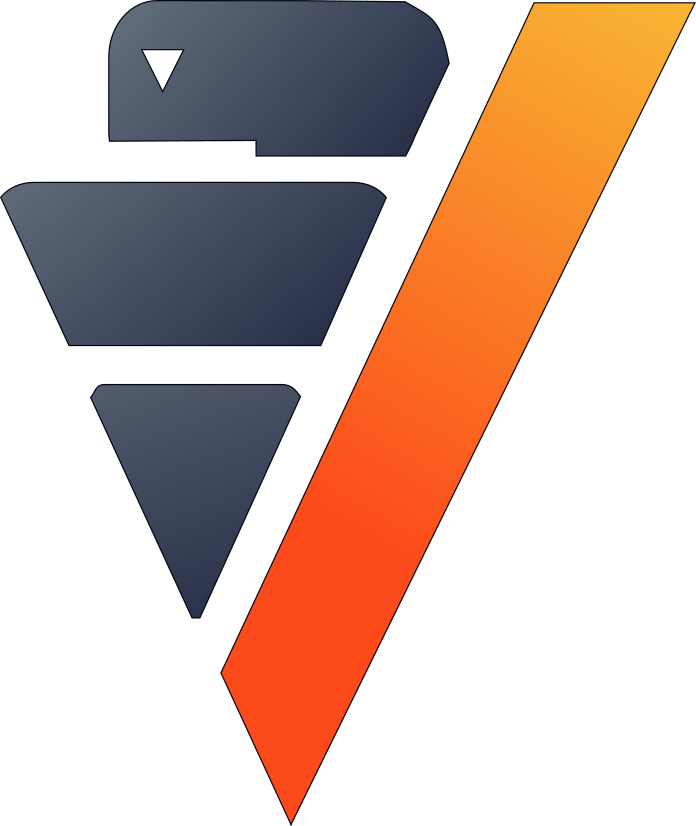

In [32]:
expedia.to_db("public.expedia_clean",
              relation_type = "table")